In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Defining the constant for image size and batch size

image size -->go to image file -click in image -click properties-go to details it has image size

batchsize-->mostly we use 32

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

# Loading image dataset

image_dataset_from_directory

used to:
    
    load the all images from all folders which are inside the directory
    
    parameters:
        directory name
        shuffle-->to shuffle the images
        imagesize-->which is size of images in directory
        batch size-->normally 32

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\91882\Downloads\potato disease",
                                                   shuffle=True,
                                                   image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                   batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


# To get classes of data set

In [4]:
classname=dataset.class_names
classname

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Length of data set

In [5]:
len(dataset)

68

why 68?

Reason:because each batch has 32 images so it shows 68 batches of images

# To get the first batch of images

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch)#comes in tensor
    print(label_batch.numpy())#converting tensor to numpy array

(32, 256, 256, 3)
tf.Tensor([0 1 1 1 2 1 1 2 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0], shape=(32,), dtype=int32)
[0 1 1 1 2 1 1 2 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0]


# Visualizing the image

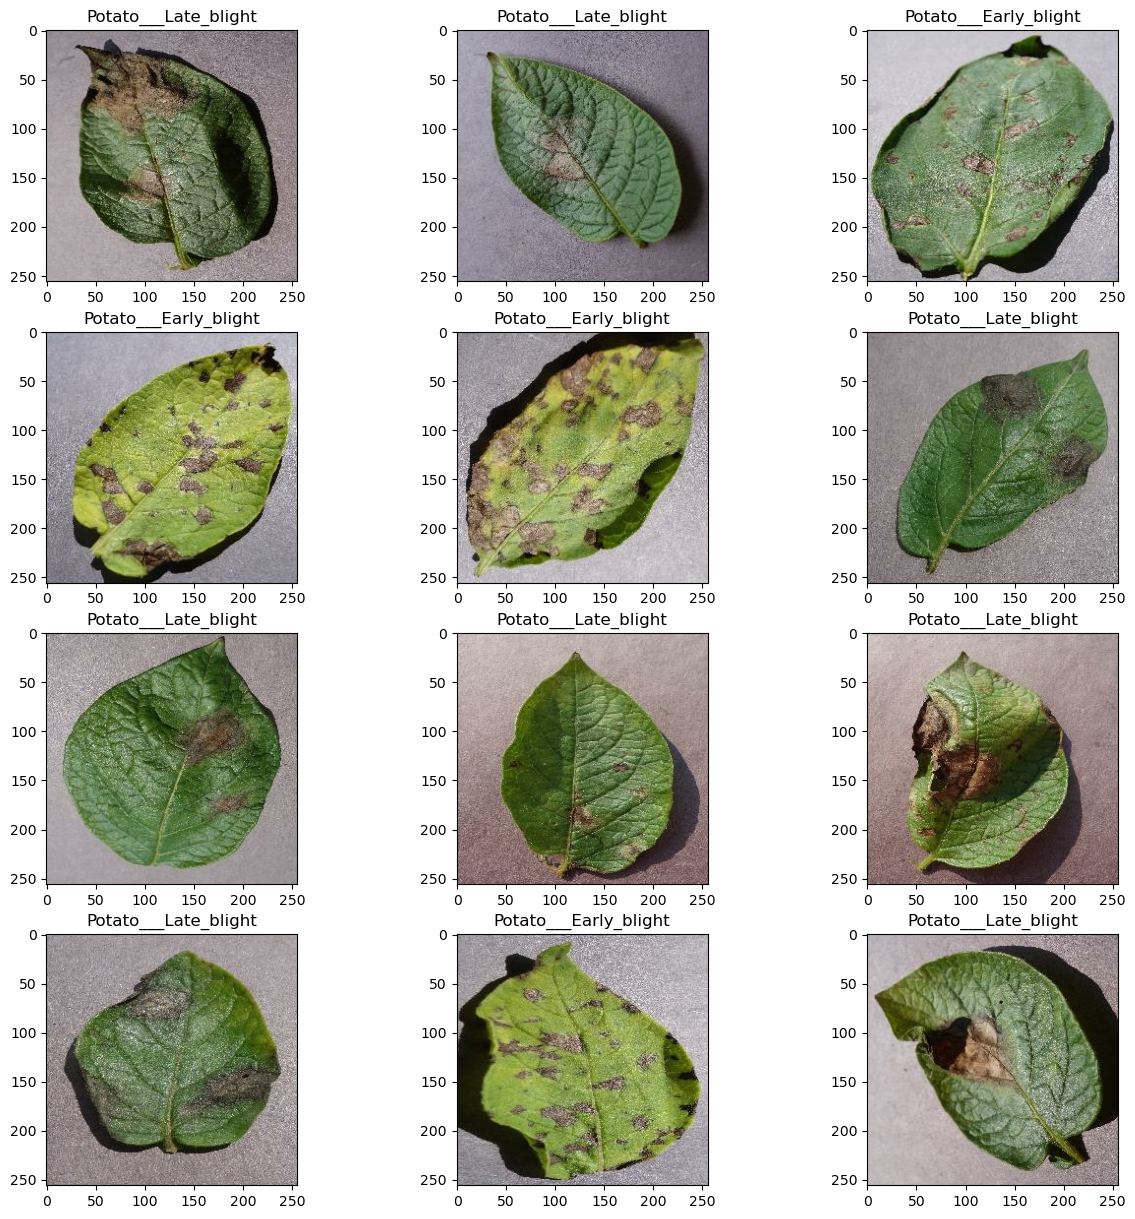

In [7]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(4,3,i+1)
        plt.title(classname[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
    #ist image usualy it is in float so we have to convert float-->uint8

# Spliting the training testing data

# Training testing and validation

# Training size

In [8]:
train_size=0.8
#for training
print("trainsize:",len(dataset)*train_size)
train_data=dataset.take(54)
print("dataset:",len(train_data))

trainsize: 54.400000000000006
dataset: 54


# Validation size

In [9]:
test_data=dataset.skip(54)
len(test_data)

14

In [10]:
validation_size=0.1
print(len(dataset)*validation_size)

6.800000000000001


In [11]:
validation_set=test_data.take(6)

In [12]:
print("validation data:",len(validation_set))

validation data: 6


# Testing size

In [13]:
testing_set=test_data.skip(6)
print("Testing data:",len(testing_set))

Testing data: 8


# Wrapping all the above hardcode to one func

In [14]:
def get_dataset_partitions(ds,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=10000):
    len_dataset=len(ds)#length of whole dataset-->size
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(len_dataset*train_split)#training size 80%
    validation_size=int(val_split*len_dataset)#validation size 10%
    
    train_ds=ds.take(train_size)#taking 80%for training
    val_ds=ds.skip(train_size).take(validation_size)# taking 10% for validation
    testing_ds=ds.skip(train_size).skip(validation_size)#taking 10% for testing
    
    return train_ds,val_ds,testing_ds

In [15]:
train_data,val_data,test_data=get_dataset_partitions(dataset)

In [16]:
print(len(train_data))
print(len(val_data))
print(len(testing_set))

54
6
8


# Caching and prefetch

In [17]:
#for training data
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#for training data
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#for training data
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Preprocessing the image data

In [18]:
resize_rescale=tf.keras.Sequential([
    #resizing
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    #scaling by diving with 255
    layers.experimental.preprocessing.Rescaling(1/255.0)
])

# DataAugmentation

In [19]:
data_augmentation=tf.keras.Sequential([
    #flipping the image
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    
    #rotating the image
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

# ModelBuilding

In [20]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
num_of_class=3
model=models.Sequential([
   
     resize_rescale,
     data_augmentation,
    
    #building layers
    #layer1:
    #param:filters,kernelsize,activation,
    
    #1]filters-->random num recommend to use pow of 2 and
    #2] kernel_size-->(height,width) give in odd,odd eg:(1,1)  (3,3)
    #3]activation layer-->basicallly we use relu
     layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),#convolution layer
     layers.MaxPooling2D((2,2)),#ppoling layer
    #layer 2:
     layers.Conv2D(64,(3,3),activation='relu'),#convolution layer
     layers.MaxPooling2D((2,2)),#ppoling layer
    #layer 3:
     layers.Conv2D(64,(3,3),activation='relu'),#convolution layer
     layers.MaxPooling2D((2,2)),#ppoling layer
    #layer 4:
     layers.Conv2D(64,(3,3),activation='relu'),#convolution layer
     layers.MaxPooling2D((2,2)),#ppoling layer 
    #layer 5:
    layers.Conv2D(64,(3,3),activation='relu'),#convolution layer
    layers.MaxPooling2D((2,2)),#ppoling layer
    
   #layer 6:
    layers.Conv2D(64,(3,3),activation='relu'),#convolution layer
    layers.MaxPooling2D((2,2)),#ppoling layer
    
    #flattening the layer
    layers.Flatten(),
    
    #hidden layer
    layers.Dense(64,activation='relu'),
    layers.Dense(num_of_class,activation='softmax')
])

In [21]:
#building model architecture

In [22]:
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [24]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
history=model.fit(
train_data,
epochs=35,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_data
)

Epoch 1/35
54/54 [==============================] - 249s 4s/step - loss: 0.9019 - accuracy: 0.4988 - val_loss: 0.8308 - val_accuracy: 0.6146
Epoch 2/35
54/54 [==============================] - 235s 4s/step - loss: 0.6649 - accuracy: 0.6881 - val_loss: 0.4752 - val_accuracy: 0.7448
Epoch 3/35
54/54 [==============================] - 229s 4s/step - loss: 0.2954 - accuracy: 0.8738 - val_loss: 0.4977 - val_accuracy: 0.7812
Epoch 4/35
54/54 [==============================] - 285s 5s/step - loss: 0.2017 - accuracy: 0.9172 - val_loss: 0.2404 - val_accuracy: 0.9479
Epoch 5/35
54/54 [==============================] - 239s 4s/step - loss: 0.1863 - accuracy: 0.9282 - val_loss: 0.2466 - val_accuracy: 0.9323
Epoch 6/35
54/54 [==============================] - 226s 4s/step - loss: 0.0999 - accuracy: 0.9664 - val_loss: 0.1809 - val_accuracy: 0.9271
Epoch 7/35
54/54 [==============================] - 234s 4s/step - loss: 0.1564 - accuracy: 0.9398 - val_loss: 0.3678 - val_accuracy: 0.9010
Epoch 8/35
54

# Evaluating the model using test data

In [26]:
scores=model.evaluate(test_data)

8/8 [==============================] - 13s 1s/step - loss: 0.0391 - accuracy: 0.9883


In [27]:
scores  #loss,acccuracy

[0.03908297047019005, 0.98828125]

# Getting parameter of model

In [28]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 54}

# To get keys of history of model

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history['accuracy']

[0.4930555522441864,
 0.7505787014961243,
 0.8582175970077515,
 0.9120370149612427,
 0.9363425970077515,
 0.8807870149612427,
 0.9328703880310059,
 0.9525462985038757,
 0.9542824029922485,
 0.9537037014961243,
 0.9664351940155029,
 0.9710648059844971,
 0.9629629850387573,
 0.9664351940155029,
 0.9797453880310059,
 0.9803240895271301,
 0.9646990895271301,
 0.9866898059844971,
 0.9878472089767456,
 0.9849537014961243,
 0.9820601940155029,
 0.9855324029922485,
 0.9861111044883728,
 0.9814814925193787,
 0.9849537014961243,
 0.9861111044883728,
 0.9866898059844971,
 0.9872685074806213,
 0.96875,
 0.9832175970077515,
 0.9895833134651184,
 0.9924768805503845,
 0.9872685074806213,
 0.9849537014961243,
 0.9693287014961243]

In [31]:
history_accuracy=history.history['accuracy']
history_val_accuracy=history.history['val_accuracy']
history_loss=history.history['loss']
history_val_loss=history.history['val_loss']

In [32]:
print("accuracy",history_accuracy)
print()
print("val_accurcay",history_val_accuracy)
print()
print("history_loss",history_loss)
print()
print("history_val_loss",history_val_loss)

accuracy [0.4930555522441864, 0.7505787014961243, 0.8582175970077515, 0.9120370149612427, 0.9363425970077515, 0.8807870149612427, 0.9328703880310059, 0.9525462985038757, 0.9542824029922485, 0.9537037014961243, 0.9664351940155029, 0.9710648059844971, 0.9629629850387573, 0.9664351940155029, 0.9797453880310059, 0.9803240895271301, 0.9646990895271301, 0.9866898059844971, 0.9878472089767456, 0.9849537014961243, 0.9820601940155029, 0.9855324029922485, 0.9861111044883728, 0.9814814925193787, 0.9849537014961243, 0.9861111044883728, 0.9866898059844971, 0.9872685074806213, 0.96875, 0.9832175970077515, 0.9895833134651184, 0.9924768805503845, 0.9872685074806213, 0.9849537014961243, 0.9693287014961243]

val_accurcay [0.5989583134651184, 0.8697916865348816, 0.8802083134651184, 0.9010416865348816, 0.9427083134651184, 0.8802083134651184, 0.96875, 0.9427083134651184, 0.9583333134651184, 0.9791666865348816, 0.9322916865348816, 0.9739583134651184, 0.984375, 0.9479166865348816, 0.9270833134651184, 0.97395

In [35]:
EPOCHS=35

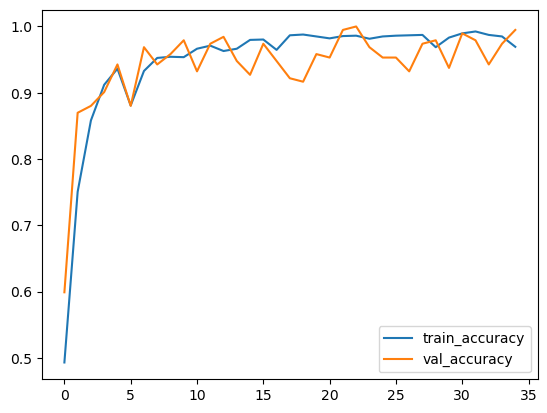

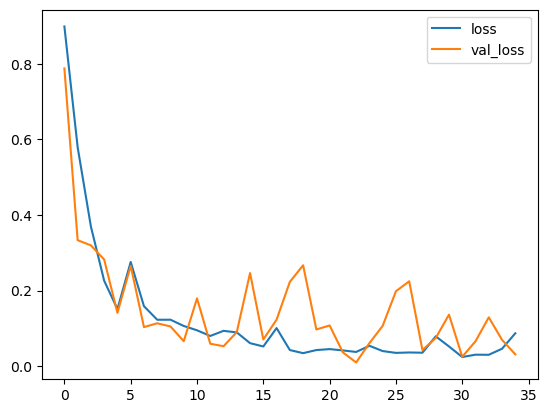

In [36]:
plt.plot(range(EPOCHS),history_accuracy,label='train_accuracy')
plt.plot(range(EPOCHS),history_val_accuracy,label='val_accuracy')
plt.legend(loc='lower right')
plt.show()
plt.plot(range(EPOCHS),history_loss,label='loss')
plt.plot(range(EPOCHS),history_val_loss,label='val_loss')
plt.legend(loc='upper right')
plt.show()

# Predicting our model test data

In [37]:
import numpy as np

first image to predict
actual_label Potato___Late_blight
model prediction
1/1 [==============================] - 2s 2s/step
predicted label Potato___Late_blight


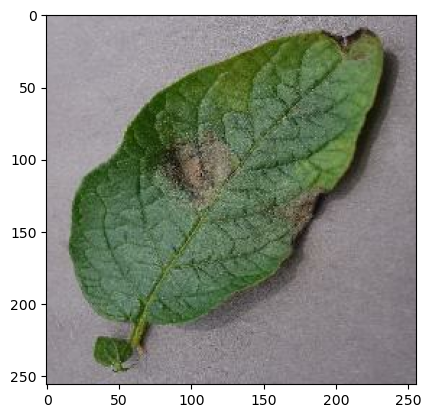

In [38]:
for images_batch,label_batch in test_data.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print("actual_label",classname[first_label])
    
    print('model prediction')
    batch_prediction=model.predict(images_batch)
    print('predicted label',classname[np.argmax(batch_prediction[0])])

In [41]:
import numpy as np

In [50]:
def predict(model,img):
    #first-->converting image to array
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    #expand_dims  :param==>input,axis,name(optional)
    #to insert addition dimension in tensor
    #how it performs:
   '''[[1,2,3]
    [4,5,6]] 2x3 mat
    aplying: expand_dims(mat,0)     expand_dims(mat,1)
        
    o/p:                            op:  [[[1,2,3]],[[4,5,6]]] shape==>2,1,3
           [[[1,2,3],[4,5,6]]]
        shape==>1,2,3'''
        
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=classname[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 93ms/step


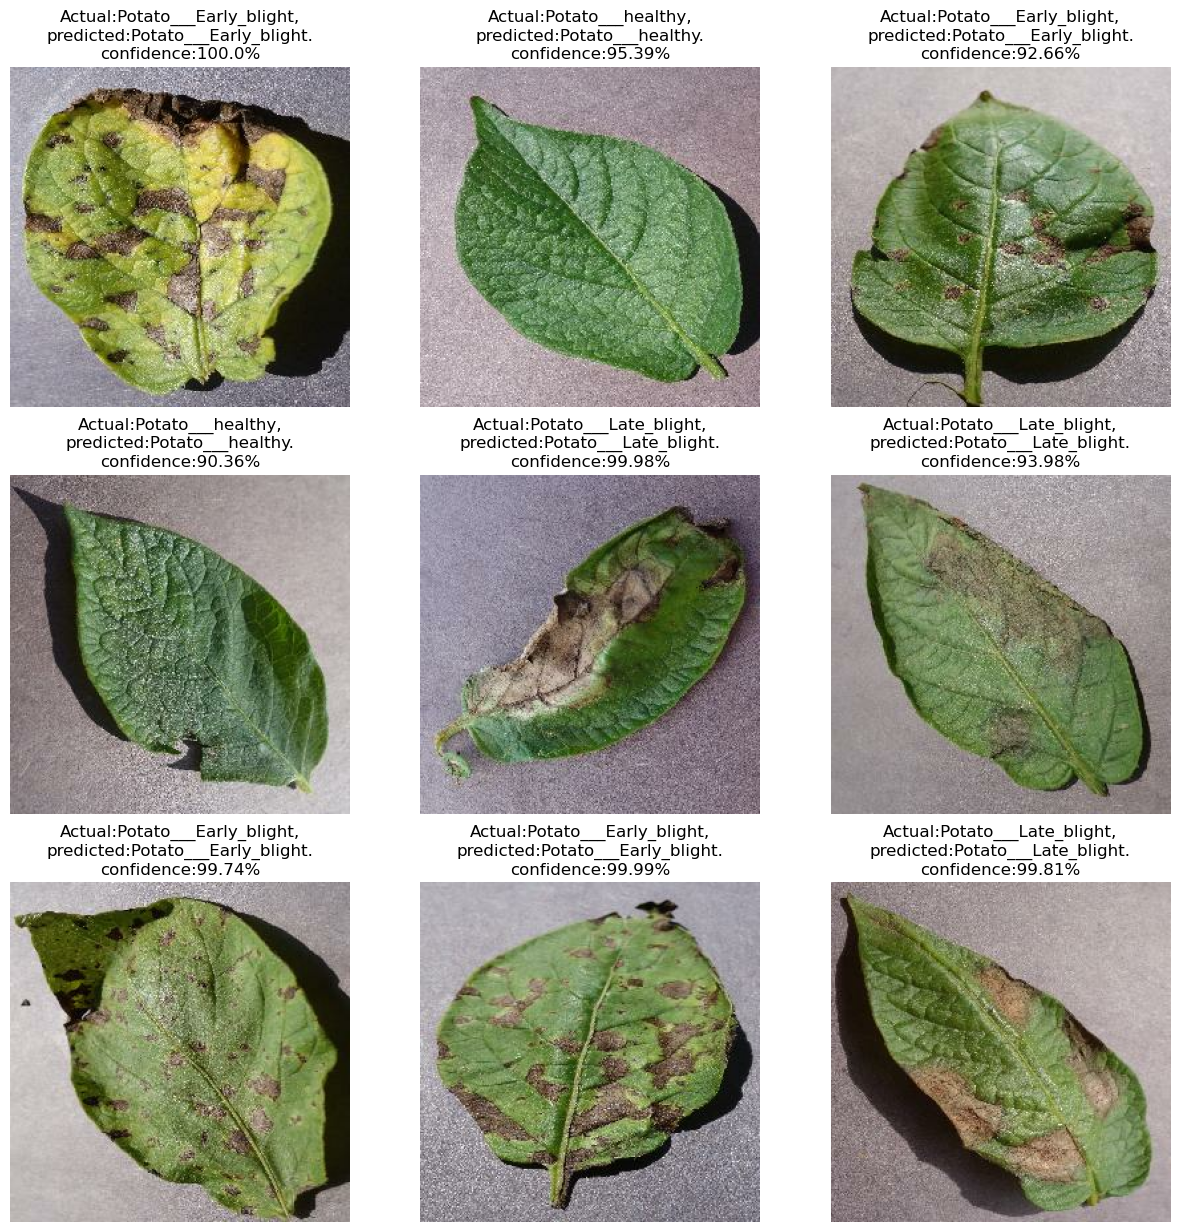

In [53]:
plt.figure(figsize=(15,15))
for images,labels in testing_set.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i])
        actual_class=classname[labels[i]]
        plt.title(f"Actual:{actual_class},\npredicted:{predicted_class}.\nconfidence:{confidence}%")
        plt.axis('off')

# Saving the model

In [54]:
model.save('potato1.h5')

# Loading saved model

In [3]:
new_model=models.load_model('potato1.h5')

In [4]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [5]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\91882\AppData\Local\Temp\tmp8np306ed\assets


INFO:tensorflow:Assets written to: C:\Users\91882\AppData\Local\Temp\tmp8np306ed\assets


In [6]:
with open('potato_model.tflite', 'wb') as f:
    f.write(tflite_model)